<a href="https://colab.research.google.com/github/ranubansal/DSML-Projects/blob/main/Scaler_clustering_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and
subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with
exposure to the latest technologies. It is a product by InterviewBit.
You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from
the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile,
company, and other features. Ideally, these clusters should have similar characteristics.


# **Data Dictionary:**



* 'Unnamed 0' - Index of the dataset
* Email_hash - Anonymised Personal Identifiable Information (PII)
* Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.
* orgyear - Employment start date
* CTC - Current CTC
* Job_position - Job profile in the company
* CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)


# **Concept Used:**

* Manual Clustering
* Unsupervised Clustering - K- means, Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, ConfusionMatrixDisplay, auc
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from statsmodels.stats import diagnostic
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.formula.api import ols
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.stattools import durbin_watson
import joblib
import scipy.stats as spy
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import re

In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv"

--2024-08-15 16:33:40--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.61, 18.172.139.46, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24735965 (24M) [text/plain]
Saving to: ‘scaler_clustering.csv.1’

scaler_clustering.c 100%[===================>]  23.59M   109MB/s    in 0.2s    

2024-08-15 16:33:40 (109 MB/s) - ‘scaler_clustering.csv.1’ saved [24735965/24735965]



In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('scaler_clustering.csv')

In [ ]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df.shape

(205843, 7)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


In [ ]:
(df.isna().sum()/ df.shape[0])*100

,0
Unnamed: 0,0.000000
company_hash,0.021376
email_hash,0.000000
orgyear,0.041779
ctc,0.000000
job_position,25.535967
ctc_updated_year,0.000000


In [ ]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000




*   205843 learners data
*   Based on above information , noticing some unusual outliers in the data



In [ ]:
df.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [ ]:
def preprocess_string(string):
  new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
  return new_string

my_string= '\tAirtel X Labs'
preprocess_string(my_string)


'airtel x labs'

In [ ]:
df['company_hash'].nunique()

37299

37299 unique company hash are there in the dataset

In [ ]:
df['company_hash']= df['company_hash'].apply(lambda x:preprocess_string(str(x)))
df['company_hash'].nunique()

37208

In [ ]:
df['job_position'].nunique()

1016

1016 unique company hash are there in the dataset after preprocessing strings

1016 unique job positions are there in the dataset

In [ ]:
df['job_position']= df['job_position'].apply(lambda x:preprocess_string(str(x)))
df.job_position.nunique()

856

856 unique job positions are there in the dataset after preprocessing strings

In [ ]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0


In [ ]:
df['orgyear'].value_counts()

,count
orgyear,
2018.0,25256
2019.0,23427
2017.0,23239
2016.0,23043
2015.0,20610
...,...
2107.0,1
1972.0,1
2101.0,1


In [ ]:
df['orgyear'].quantile(0.001)

1991.0

In [ ]:
df["orgyear"].quantile(0.999)

2023.0

In [ ]:
df = df.loc[((df.orgyear) > df.orgyear.quantile(0.001)) & ((df.orgyear) < df.orgyear.quantile(0.999))]
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,nan,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,nan,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,nan,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,nan,2019.0


In [ ]:
df['ctc_updated_year'].quantile(0.001)

2015.0

In [ ]:
df['ctc_updated_year'].quantile(0.99)

2021.0

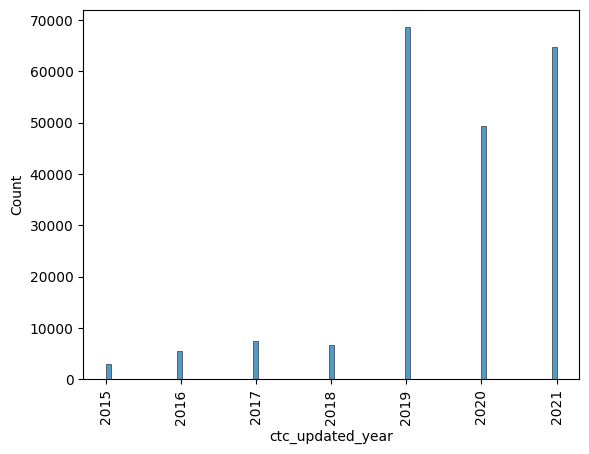

In [ ]:
sns.histplot(df["ctc_updated_year"])
plt.xticks(rotation = 90)
plt.show()

From the graph maximum ctc was updated in year 2019 & 2021

In [ ]:
#Outlier treatment of CTC
df['ctc'].quantile(0.01)

39000.0

In [ ]:
df['ctc'].quantile(0.999)

200000000.0

In [ ]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,nan,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,nan,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,nan,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,nan,2019.0


<ipython-input-132-430ce9efb497>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ctc"])


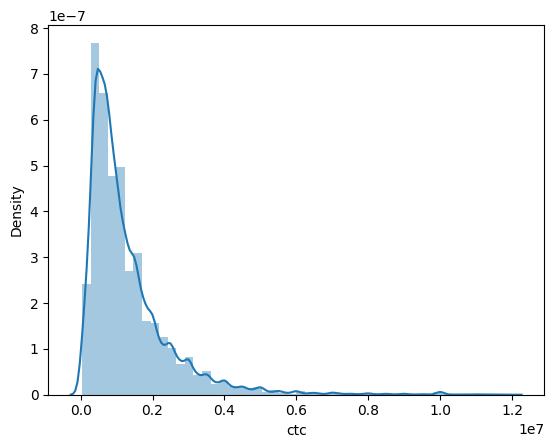

In [ ]:
sns.distplot(df["ctc"])
plt.show()

Most people are having ctc till 20-25 lakh

In [ ]:
df.loc[df['job_position']=='nan', 'job_position']= np.nan


In [ ]:
df.loc[df["company_hash"]=="nan","company_hash"] = np.nan


# **Feature Engineering**

Masked company name to "Others" having count less than 5

In [ ]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"


In [ ]:
(df["company_hash"] == "Others").sum()


46236

In [ ]:
df['orgyear'].max()

2022.0

## **years of experience = current year - employement start year**

In [ ]:
df["years_of_experience_in_organization"]= 2023- df['orgyear']

<ipython-input-138-46ff50e71db3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["years_of_experience_in_organization"]= 2023- df['orgyear']


In [ ]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0
2,2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0


<Axes: xlabel='years_of_experience_in_organization', ylabel='Count'>

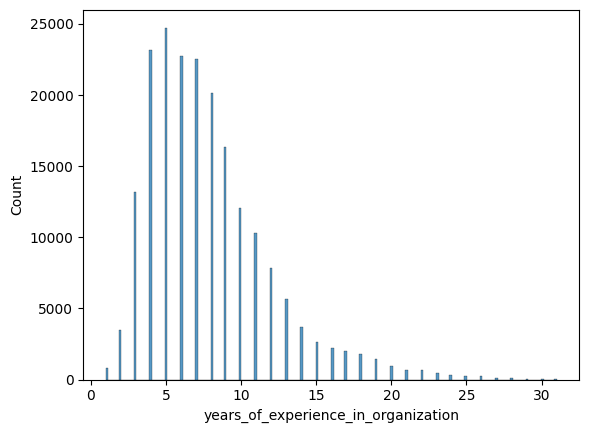

In [ ]:
sns.histplot(df["years_of_experience_in_organization"])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()


,0
Unnamed: 0,0
company_hash,42
email_hash,0
orgyear,0
ctc,0
job_position,51552
ctc_updated_year,0
years_of_experience_in_organization,0


In [ ]:
# treating records having ctc_updated_year higher than their organization joining year
# records having ctc_updated_year higher than their organization joining year
(df["ctc_updated_year"] < df["orgyear"]).sum()

8186

In [ ]:
df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)

<ipython-input-144-8a8b6ca90ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)


In [ ]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

0

In [ ]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0
2,2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0


In [ ]:
# Filling null values with others

df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

<ipython-input-147-fa9fe98c0210>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_position'] = df['job_position'].fillna('Others')
<ipython-input-147-fa9fe98c0210>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_hash'] = df['company_hash'].fillna('Others')


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
company_hash,0
email_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0
years_of_experience_in_organization,0


In [ ]:
# glacing over data after outlier treatment and preprocessing
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization
count,201033.000000,201033.000000,2.010330e+05,201033.000000,201033.000000
mean,103615.328021,2015.133585,1.307840e+06,2019.684161,7.866415
std,59680.496513,4.143046,1.212443e+06,1.284936,4.143046
min,0.000000,1992.000000,3.955000e+04,2015.000000,1.000000
25%,52016.000000,2013.000000,5.500000e+05,2019.000000,5.000000
50%,103609.000000,2016.000000,9.500000e+05,2020.000000,7.000000
75%,155303.000000,2018.000000,1.650000e+06,2021.000000,10.000000
max,206922.000000,2022.000000,1.195000e+07,2022.000000,31.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201033 entries, 0 to 205842
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           201033 non-null  int64  
 1   company_hash                         201033 non-null  object 
 2   email_hash                           201033 non-null  object 
 3   orgyear                              201033 non-null  float64
 4   ctc                                  201033 non-null  int64  
 5   job_position                         201033 non-null  object 
 6   ctc_updated_year                     201033 non-null  float64
 7   years_of_experience_in_organization  201033 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 13.8+ MB


In [ ]:
df.drop('Unnamed: 0', axis=1)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0
2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0
...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Others,2019.0,15.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Others,2020.0,6.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Others,2021.0,2.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Others,2019.0,4.0


# **Manual Clustering based on Company , Job position and Years of experience**

In [ ]:
GROUPED_CTC = df.groupby(["years_of_experience_in_organization", "job_position","company_hash"])["ctc"].describe()

In [ ]:
GROUPED_CTC

count  \
years_of_experience_in_organization job_position        company_hash                           
1.0                                 Others              Others                          55.0   
                                                        agzn fgqp xz vzj gqsvzxkvnxgz    1.0   
                                                        atrgxnnt                         1.0   
                                                        atrr ntwyzgrgsxto                2.0   
                                                        btaxvztn                         1.0   
...                                                                                      ...   
31.0                                program manager     zxxn ntwyzgrgsxto                1.0   
                                    qa engineer         Others                           2.0   
                                                        bxwqgogen                        1.0   
                                    security leadership vqxwtzn                          1.0   
                                    support engineer    zgzt                             1.0   

                                                                                               mean  \
years_of_experience_in_organization job_position        company_hash                                  
1.0                                 Others              Others                         1.345273e+06   
                                                        agzn fgqp xz vzj gqsvzxkvnxgz  1.600000e+06   
                                                        atrgxnnt                       1.000000e+06   
                                                        atrr ntwyzgrgsxto              1.000000e+06   
                                                        btaxvztn                       2.200000e+06   
...                                                                                             ...   
31.0                                program manager     zxxn ntwyzgrgsxto              2.800000e+06   
                                    qa engineer         Others                         1.550000e+06   
                                                        bxwqgogen                      3.000000e+06   
                                    security leadership vqxwtzn                        3.000000e+05   
                                    support engineer    zgzt                           1.600000e+06   

                                                                                                std  \
years_of_experience_in_organization job_position        company_hash                                  
1.0                                 Others              Others                         1.670380e+06   
                                                        agzn fgqp xz vzj gqsvzxkvnxgz           NaN   
                                                        atrgxnnt                                NaN   
                                                        atrr ntwyzgrgsxto              2.828427e+05   
                                                        btaxvztn                                NaN   
...                                                                                             ...   
31.0                                program manager     zxxn ntwyzgrgsxto                       NaN   
                                    qa engineer         Others                         2.022325e+06   
                                                        bxwqgogen                               NaN   
                                    security leadership vqxwtzn                                 NaN   
                                    support engineer    zgzt                                    NaN   

                                                                                             min  \
years_of_experience_in_organization job_position        co

In [ ]:
df_GROUPED_CTC_BY_E_P_C = df.merge(GROUPED_CTC,
 on = ["years_of_experience_in_organization",
 "job_position",
 "company_hash"],
 how = "left")

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,834.0,1.188984e+06,1.167971e+06,41000.0,500000.0,914999.5,1500000.0,10000000.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201028,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
201029,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
201030,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
201031,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Others,2019.0,4.0,177.0,1.203208e+06,1.461189e+06,45000.0,400000.0,700000.0,1400000.0,10000000.0


In [ ]:
def classification(x,ctc_50,ctc_75):
 if x < ctc_50:
  return 3
 elif x >= ctc_50 and x <= ctc_75:
  return 2
 elif x >= ctc_75:
  return 1

** whichever learner has ctc compared to their years of experience , respective company , position
giving designation as 3 when ctc is < 50th percentile in his position ,experience and company
giving designation as 2 when ctc is between 50th and 75th percentile in his position ,experience and
company
giving designation as 1 when ctc is > 75th percentile in his position ,experience and company **

In [ ]:
df_GROUPED_CTC_BY_E_P_C["designation_in_organization"] = df_GROUPED_CTC_BY_E_P_C.apply(lambda x:classification(x['ctc'],x['50%'],x['75%']), axis=1)

In [ ]:
df_GROUPED_CTC_BY_E_P_C.designation_in_organization.value_counts(normalize=True)

,proportion
designation_in_organization,
2,0.440530
3,0.347928
1,0.211542


In [ ]:
df_GROUPED_CTC_BY_E_P_C.drop(columns=['count',
 'mean',
 'std',
'min',
'25%',
'50%',
'75%',
'max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,2
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,3
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,2
...,...,...,...,...,...,...,...,...,...
201028,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Others,2019.0,15.0,2
201029,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Others,2020.0,6.0,3
201030,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Others,2021.0,2.0,2
201031,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Others,2019.0,4.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.drop('Unnamed: 0', axis=1)


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,2
...,...,...,...,...,...,...,...,...
201028,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Others,2019.0,15.0,2
201029,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Others,2020.0,6.0,3
201030,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Others,2021.0,2.0,2
201031,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Others,2019.0,4.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.shape

(201033, 9)

# **Manual Clustering on company and job position**
grouping by each job_position and company ,
finding which class of job an individual have,
based on his ctc compared to his job_position and respective company.

In [ ]:
GROUPED_C_J=df.groupby(['job_position','company_hash'])['ctc'].describe()
GROUPED_C_J

count      mean            std  \
job_position          company_hash                                             
                      Others                    4.0  480000.0  152534.149182   
                      fyxntyvn lq               1.0  600000.0            NaN   
                      otre tburgjta             1.0  600000.0            NaN   
                      wgszxkvzn                 1.0  470000.0            NaN   
                      zgn vuurxwvmrt vwwghzn    1.0  500000.0            NaN   
...                                             ...       ...            ...   
wordpress developer   Others                    1.0  600000.0            NaN   
worker                zgn vuurxwvmrt vwwghzn    1.0  200000.0            NaN   
x                     Others                    1.0  400000.0            NaN   
young professional ii sgctqzbtzn ge xzaxv       1.0  500000.0            NaN   
zomato                kgbvng                    2.0  300000.0  282842.712475   

                                                   min       25%       50%  \
job_position          company_hash                                           
                      Others                  350000.0  402500.0  435000.0   
                      fyxntyvn lq             600000.0  600000.0  600000.0   
                      otre tburgjta           600000.0  600000.0  600000.0   
                      wgszxkvzn               470000.0  470000.0  470000.0   
                      zgn vuurxwvmrt vwwghzn  500000.0  500000.0  500000.0   
...                                                ...       ...       ...   
wordpress developer   Others                  600000.0  600000.0  600000.0   
worker                zgn vuurxwvmrt vwwghzn  200000.0  200000.0  200000.0   
x                     Others                  400000.0  400000.0  400000.0   
young professional ii sgctqzbtzn ge xzaxv     500000.0  500000.0  500000.0   
zomato                kgbvng                  100000.0  200000.0  300000.0   

                                                   75%       max  
job_position          company_hash                                
                      Others                  512500.0  700000.0  
                      fyxntyvn lq             600000.0  600000.0  
                      otre tburgjta           600000.0  600000.0  
                      wgszxkvzn               470000.0  470000.0  
                      zgn vuurxwvmrt vwwghzn  500000.0  500000.0  
...                                                ...       ...  
wordpress developer   Others                  600000.0  600000.0  
worker                zgn vuurxwvmrt vwwghzn  200000.0  200000.0  
x                     Others                  400000.0  400000.0  
young professional ii sgctqzbtzn ge xzaxv     500000.0  500000.0  
zomato                kgbvng                  400000.0  500000.0  

[25546 rows x 8 columns]

In [ ]:
df_GROUPED_C_J=df.merge(GROUPED_C_J, on=['job_position','company_hash'], how='left')

In [ ]:
df_GROUPED_C_J.head(5)


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0
2,2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,7109.0,1.199460e+06,1.283983e+06,40000.0,450000.0,900000.0,1500000.0,11800000.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,25.0,1.500000e+06,6.772124e+05,520000.0,1050000.0,1540000.0,1800000.0,3500000.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0


In [ ]:
# creating classes basis on the salary in their respective company
df_GROUPED_C_J['classs'] = df_GROUPED_C_J.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_GROUPED_C_J.head(5)


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,classs
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0,3
2,2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,7109.0,1.199460e+06,1.283983e+06,40000.0,450000.0,900000.0,1500000.0,11800000.0,1
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,25.0,1.500000e+06,6.772124e+05,520000.0,1050000.0,1540000.0,1800000.0,3500000.0,3
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0,1


In [ ]:
df_GROUPED_C_J.classs.value_counts(normalize=True)


,proportion
classs,
3,0.440465
2,0.318535
1,0.241000


In [ ]:
df_GROUPED_C_J.drop(columns=['count',
 'mean',
 'std',
'min',
'25%',
'50%',
'75%',
'max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C.iloc[0]


,0
Unnamed: 0,0
company_hash,atrgxnnt xzaxv
email_hash,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...
orgyear,2016.0
ctc,1100000
job_position,other
ctc_updated_year,2020.0
years_of_experience_in_organization,7.0
designation_in_organization,2


In [ ]:
df_GROUPED_C_J.iloc[0]


,0
Unnamed: 0,0
company_hash,atrgxnnt xzaxv
email_hash,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...
orgyear,2016.0
ctc,1100000
job_position,other
ctc_updated_year,2020.0
years_of_experience_in_organization,7.0
classs,1


In [ ]:
df_Grouped = df_GROUPED_CTC_BY_E_P_C.merge(df_GROUPED_C_J, on=['company_hash',
 'orgyear',
'ctc',
'job_position',
'years_of_experience_in_organization',
'ctc_updated_year'], how='left')

In [ ]:
df_Grouped.sample(5)

,Unnamed: 0_x,company_hash,email_hash_x,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,Unnamed: 0_y,email_hash_y,classs
513615,159174,vbvkgz,59e2aa6a2cd143de40e2b00f816b43e5e65b52171df5e3...,2018.0,5150000,backend engineer,2020.0,5.0,1,159174,59e2aa6a2cd143de40e2b00f816b43e5e65b52171df5e3...,1
231324,62829,fxuqg rxbxnta,9ab0e55997b68d55d0dcc2c6b7be3490ccbceb08279d90...,2014.0,530000,backend engineer,2017.0,9.0,3,62829,9ab0e55997b68d55d0dcc2c6b7be3490ccbceb08279d90...,3
550745,176210,adw ntwyzgrgsxto,cd2c8b9260b5d578713c026740cb9fa5810d7214cc8b6a...,2016.0,550000,frontend engineer,2019.0,7.0,3,176210,cd2c8b9260b5d578713c026740cb9fa5810d7214cc8b6a...,2
203861,55944,Others,51144d54929e0a25ce15cee923765c257f374f4113f42b...,2018.0,700000,backend engineer,2021.0,5.0,2,55944,51144d54929e0a25ce15cee923765c257f374f4113f42b...,3
134050,35142,Others,1992335c80e48e97e419742b4d40a05bcbb739dbe53c09...,2017.0,500000,Others,2021.0,6.0,3,42062,b68315fdbc421b8fb22da98f69c748da334bad7a0966bf...,3


# **Manual Clustering based on comapny**
based on ctc per company , assigning company as tier 1 2 and 3 per each learners


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

<ipython-input-174-eb0e90c65406>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
GROUPED_C = df.groupby(['company_hash'])['ctc'].describe()
GROUPED_C

,count,mean,std,min,25%,50%,75%,max
company_hash,,,,,,,,
,84.0,9.033452e+05,7.362579e+05,100000.0,450000.0,700000.0,1025000.0,4500000.0
Others,46278.0,1.100669e+06,1.157155e+06,40000.0,450000.0,770000.0,1335750.0,11800000.0
a ntwyzgrgsxto,16.0,1.234688e+06,1.277246e+06,350000.0,500000.0,600000.0,1350000.0,4000000.0
aaqxctz avnv owxtzwto vzvrjnxwo ucn rna,8.0,9.850000e+05,1.108603e+06,360000.0,465000.0,500000.0,845000.0,3600000.0
abwavnv ojontb,5.0,7.320000e+05,4.381780e+04,700000.0,700000.0,700000.0,780000.0,780000.0
...,...,...,...,...,...,...,...,...
zxxn rna,7.0,9.014286e+05,5.194365e+05,280000.0,500000.0,810000.0,1260000.0,1700000.0
zxyxrtzn,8.0,6.887500e+05,3.221551e+05,330000.0,420000.0,715000.0,812500.0,1300000.0
zxyxrtzn ntwyzgrgsxto,12.0,8.170000e+05,3.943819e+05,50000.0,590000.0,800000.0,992500.0,1500000.0


In [ ]:
df_company = df.merge(GROUPED_C, on=['company_hash'], how='left')

In [ ]:
df_company.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,420.0,1.208052e+06,9.513553e+05,200000.0,600000.0,900000.0,1650000.0,7200000.0
2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,46278.0,1.100669e+06,1.157155e+06,40000.0,450000.0,770000.0,1335750.0,11800000.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,6.0,70.0,1.713929e+06,9.677693e+05,200000.0,1100000.0,1400000.0,2000000.0,4700000.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,6.0,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0


In [ ]:
df_company['tier'] =df_company.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_company.tier.value_counts(normalize=True)


,proportion
tier,
3,0.477807
2,0.282108
1,0.240085


In [ ]:
df_company.drop(['count','mean','std','min','25%','50%','75%','max'],
 axis = 1,
 inplace=True)

In [ ]:
df_company.iloc[0]


,0
company_hash,atrgxnnt xzaxv
email_hash,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...
orgyear,2016.0
ctc,1100000
job_position,other
ctc_updated_year,2020.0
years_of_experience_in_organization,7.0
tier,2


In [ ]:
df_Grouped = df_Grouped.merge(df_company,
 on=['company_hash',
 'orgyear','ctc',
'job_position',
'years_of_experience_in_organization',
'ctc_updated_year'
 ])


In [ ]:
df_Grouped.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'] , axis=1, inplace=True)

In [ ]:
df_Grouped

,company_hash,email_hash_x,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,email_hash_y,classs,email_hash,tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,2,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,3,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,3,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,3
2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1
3,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1,9ec5c45088530734a986d5a408db4597fc2cbd03a82574...,1
4,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1,18ccb0bfe1261e08d5fb0592f15af73922dce0a9a48c5a...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13336402,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Others,2019.0,15.0,2,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,3,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,3
13336403,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Others,2020.0,6.0,3,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,3,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,3
13336404,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Others,2021.0,2.0,2,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,3,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,3
13336405,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Others,2019.0,4.0,1,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,1,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,1


In [ ]:
X = df_Grouped.copy()

In [ ]:
X.shape

(13336407, 12)

In [ ]:
X_data = X.drop(["company_hash","job_position","email_hash_x", "email_hash_y", "email_hash"],axis = 1)


In [ ]:
# Final data for Model
X_data


,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,2016.0,1100000,2020.0,7.0,2,1,2
1,2018.0,449999,2019.0,5.0,3,3,3
2,2015.0,2000000,2020.0,8.0,1,1,1
3,2015.0,2000000,2020.0,8.0,1,1,1
4,2015.0,2000000,2020.0,8.0,1,1,1
...,...,...,...,...,...,...,...
13336402,2008.0,220000,2019.0,15.0,2,3,3
13336403,2017.0,500000,2020.0,6.0,3,3,3
13336404,2021.0,700000,2021.0,2.0,2,3,3
13336405,2019.0,5100000,2019.0,4.0,1,1,1


In [ ]:
scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(scaler.transform(X_data), columns=X_data.columns, index=X_data.index)

In [ ]:
X_sc

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,-0.971470,2.025022,-1.005457,0.971470,-1.049398,-4.212316,-2.050049
1,0.083713,-0.132667,-2.517180,-0.083713,0.763184,0.436861,0.388452
2,-1.499061,5.012586,-1.005457,1.499061,-2.861980,-4.212316,-4.488551
3,-1.499061,5.012586,-1.005457,1.499061,-2.861980,-4.212316,-4.488551
4,-1.499061,5.012586,-1.005457,1.499061,-2.861980,-4.212316,-4.488551
...,...,...,...,...,...,...,...
13336402,-5.192200,-0.896152,-2.517180,5.192200,-1.049398,0.436861,0.388452
13336403,-0.443879,0.033312,-1.005457,0.443879,0.763184,0.436861,0.388452
13336404,1.666486,0.697215,0.506267,-1.666486,-1.049398,0.436861,0.388452
13336405,0.611304,15.303084,-2.517180,-0.611304,-2.861980,-4.212316,-4.488551


# **hierarchical Custering :**

trying to get a high level idea about how many clusters we can from, by taking sample of 500 learners multiple times and forming hierarchy
and visualising in dendrogram.


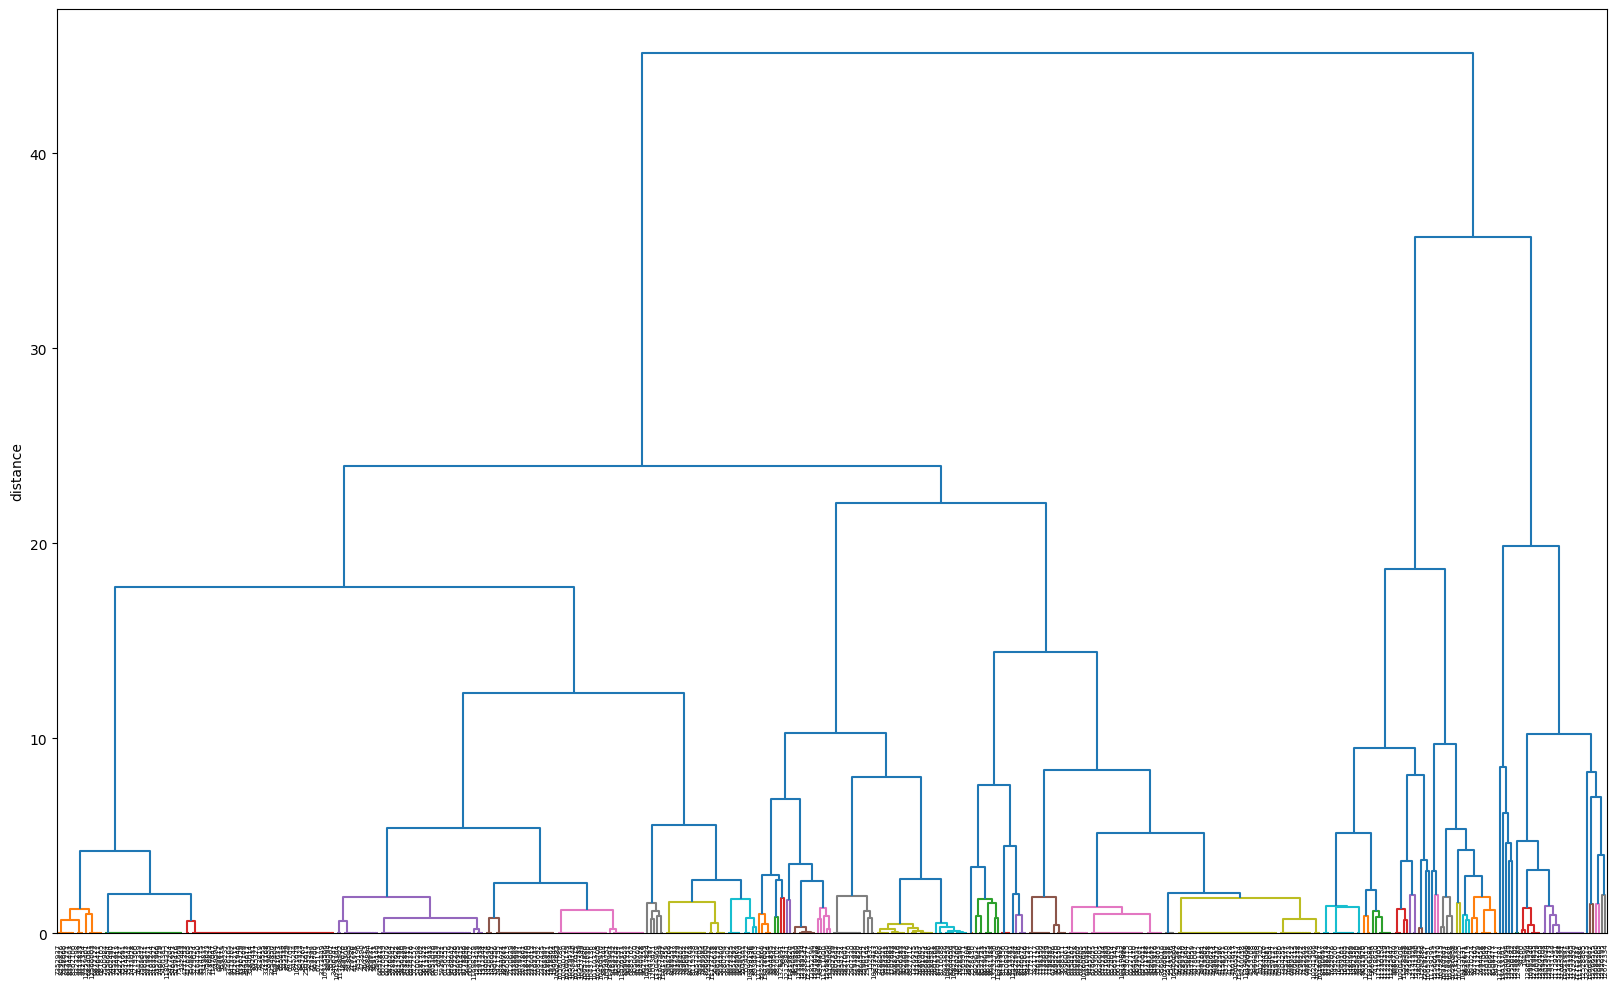

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')
fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()

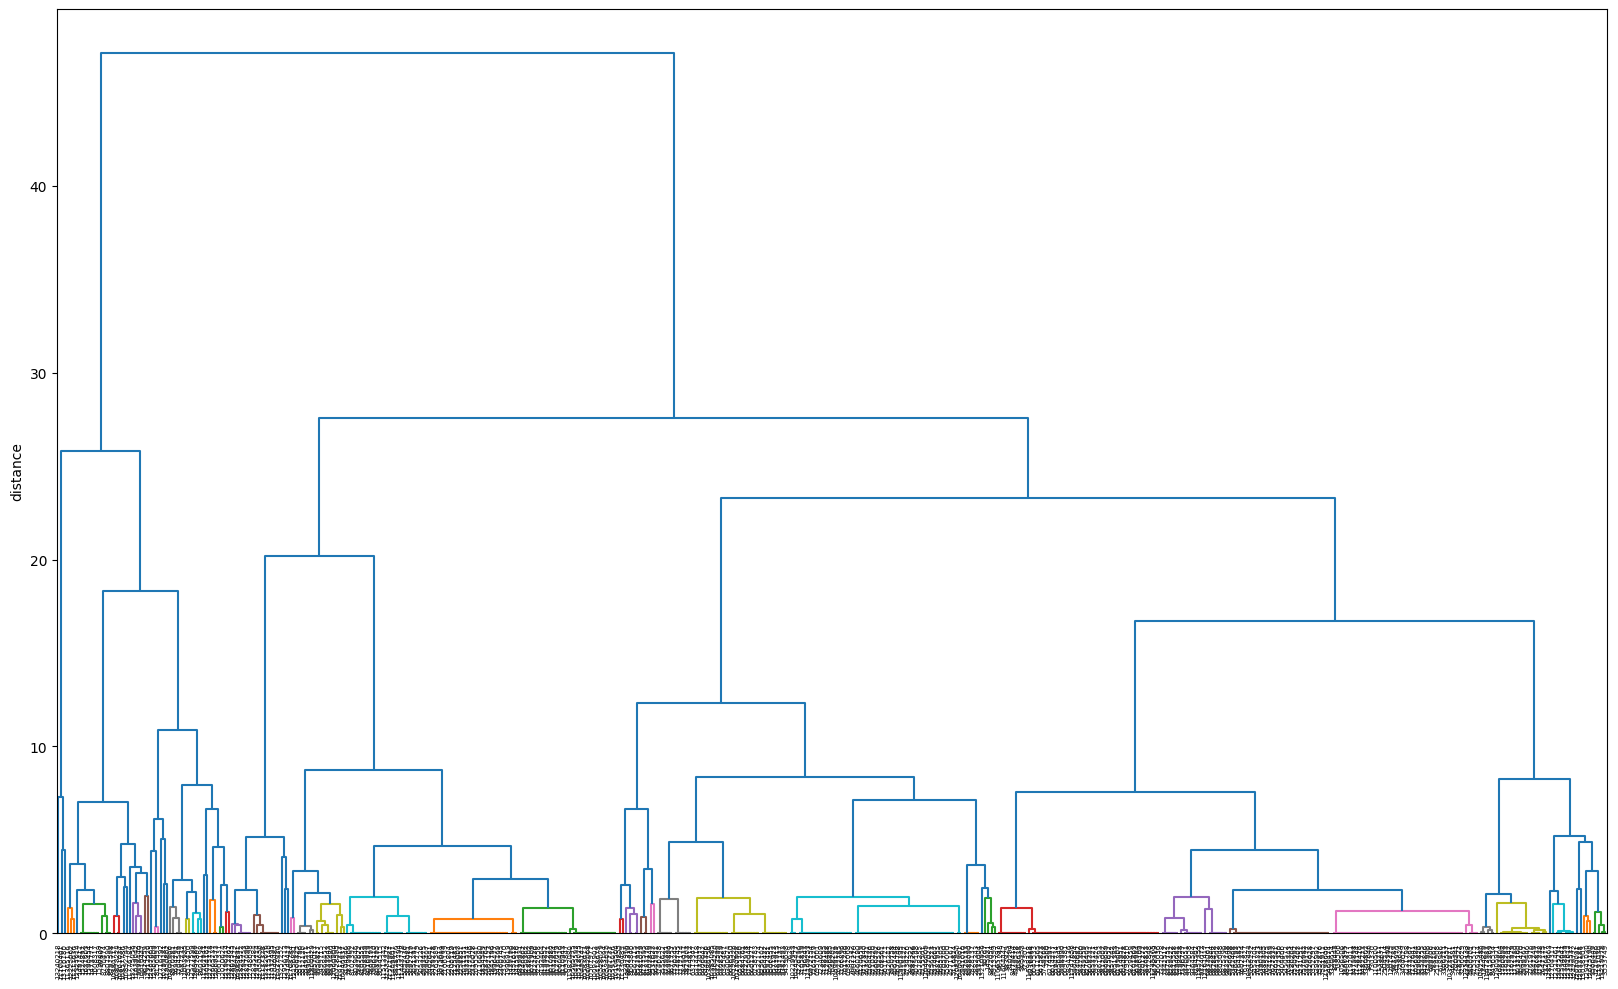

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')
fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()

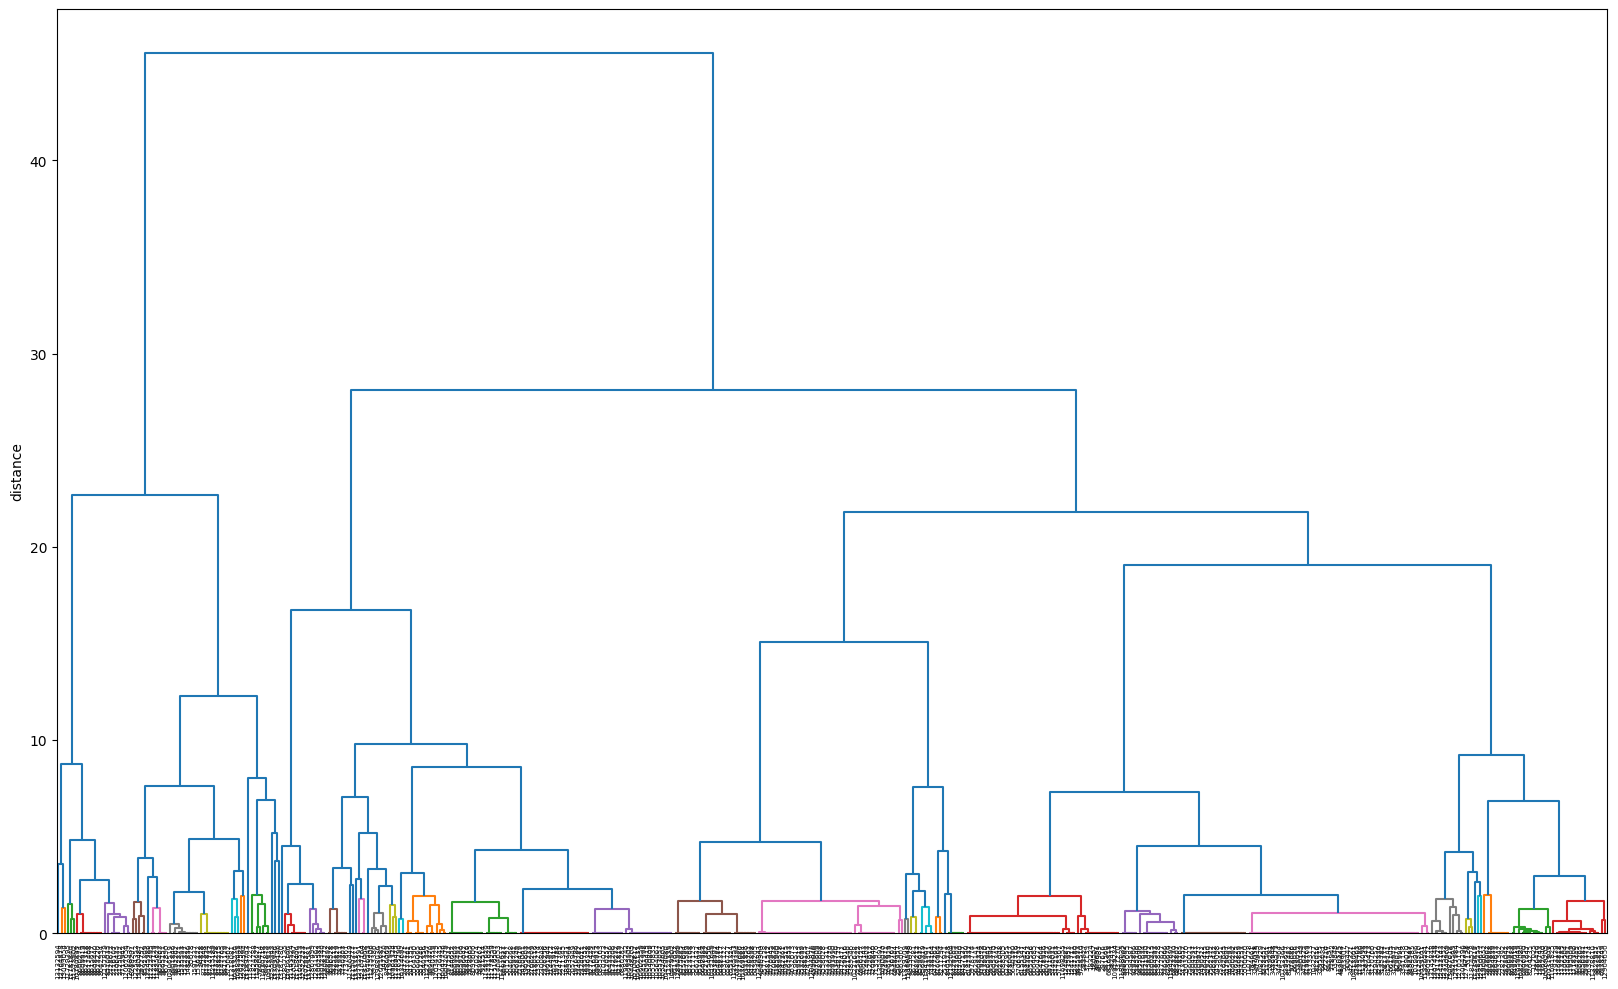

In [ ]:
 import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')
fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()

Based on dendrogram , we can observe there are 3 clusters in the data based on similarity
Further checking appropriate number of clusters using Elbow Method using k-Means clustering :

# **KMeans**


In [ ]:
for i in range(1,10):
 from sklearn.cluster import KMeans
 k = 4
 kM = KMeans(n_clusters=k,
 random_state=654)
 y_pred = kM.fit_predict(X_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc)
 for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[93354848.99906139,
 61371777.17147033,
 49976959.34980211,
 41801581.36133682,
 35257899.58582384,
 29275954.72705941,
 25868007.545745637,
 22779156.88689486,
 21073892.26634833]

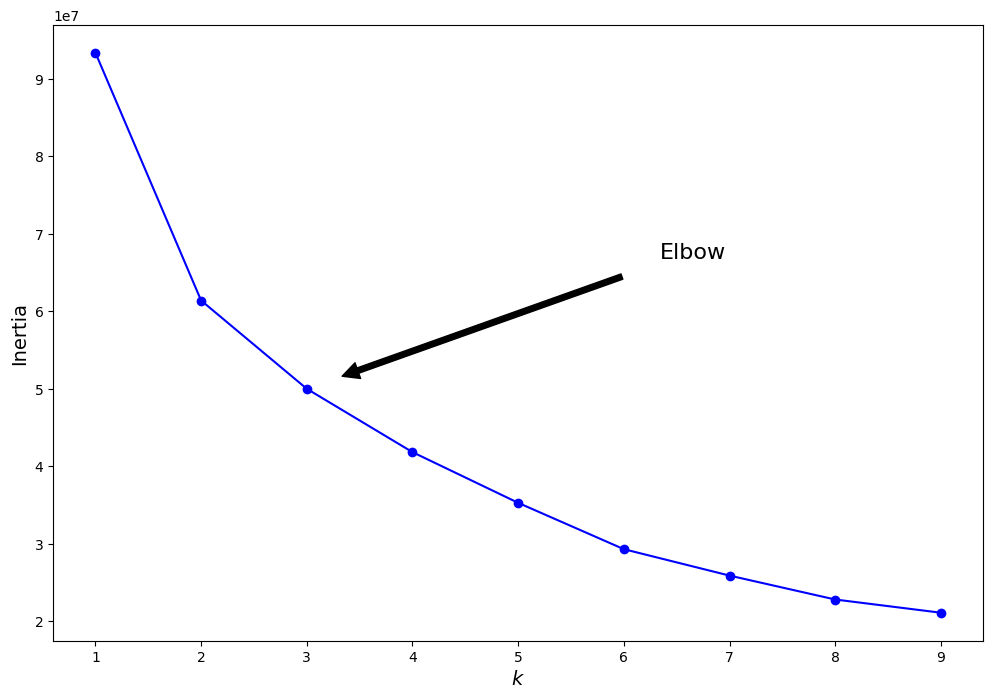

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
 xy=(3, inertias[2]),
 xytext=(0.55, 0.55),
 textcoords='figure fraction',
 fontsize=16,
 arrowprops=dict(facecolor='black', shrink=0.1)
 )
plt.show()

In [ ]:
# KMeans with n_clusters = 3
from sklearn.cluster import KMeans
k = 3
kM = KMeans(n_clusters=k,
 random_state=654)
y_pred = kM.fit_predict(X_sc)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [ ]:
clusters.head(5)

,company_hash,email_hash_x,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,email_hash_y,classs,email_hash,tier,label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,7.0,2,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,5.0,3,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,3,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,3,0
2,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1,2
3,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1,9ec5c45088530734a986d5a408db4597fc2cbd03a82574...,1,2
4,Others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,8.0,1,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,1,18ccb0bfe1261e08d5fb0592f15af73922dce0a9a48c5a...,1,2


<ipython-input-96-0465761e8cae>:1: FutureWarning: The provided callable <function mean at 0x7cf6bab6fd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(index = clusters["label"],


<Axes: xlabel='label'>

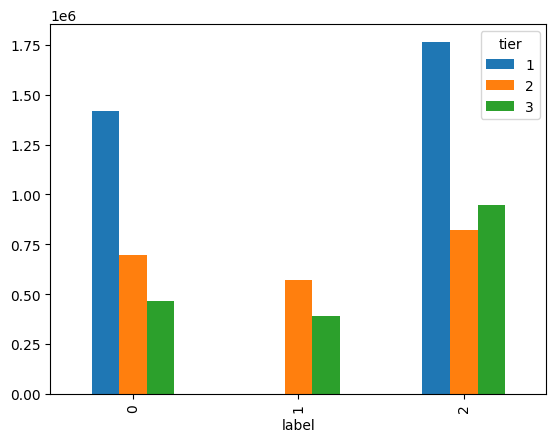

In [ ]:
pd.crosstab(index = clusters["label"],
 columns = clusters["tier"],values=clusters["ctc"],aggfunc= np.mean
 ).plot(kind = "bar")

<ipython-input-97-c41fd8c7e682>:2: FutureWarning: The provided callable <function mean at 0x7cf6bab6fd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(index = clusters["label"],


<Axes: xlabel='label'>

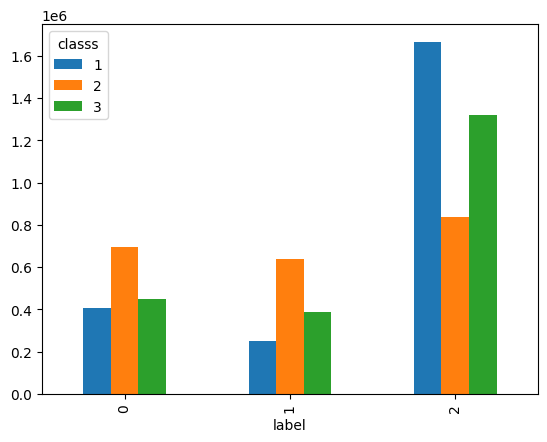

In [ ]:
# Based on k-Means Clustering algorithm output , as well as manual clustering , learners from tier1 company receiving
pd.crosstab(index = clusters["label"],
 columns = clusters["classs"],values=clusters["ctc"],aggfunc= np.mean
 ).plot(kind = "bar")

<ipython-input-98-152c331577cc>:1: FutureWarning: The provided callable <function mean at 0x7cf6bab6fd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(index = clusters["label"],


<Axes: xlabel='label'>

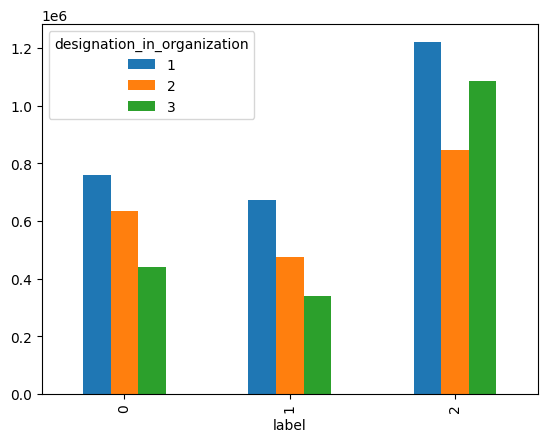

In [ ]:
pd.crosstab(index = clusters["label"],
 columns = clusters["designation_in_organization"],
 values=clusters["ctc"],aggfunc= np.mean
 ).plot(kind = "bar")

<ipython-input-99-2bf1f3732b1f>:1: FutureWarning: The provided callable <function mean at 0x7cf6bab6fd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(columns = clusters["label"],


<Axes: xlabel='years_of_experience_in_organization'>

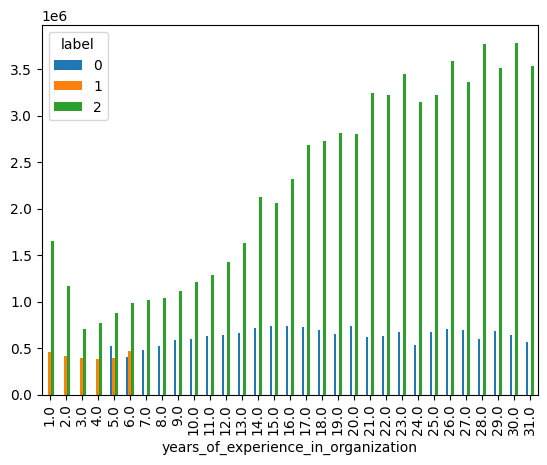

In [ ]:
pd.crosstab(columns = clusters["label"],
 index = clusters["years_of_experience_in_organization"],
 values=clusters["ctc"],aggfunc= np.mean
 ).plot(kind = "bar")

<Axes: xlabel='years_of_experience_in_organization'>

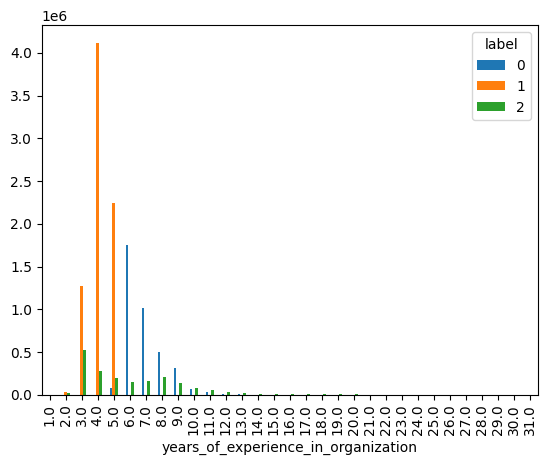

In [ ]:
pd.crosstab(columns = clusters["label"],
 index = clusters["years_of_experience_in_organization"],

 ).plot(kind = "bar")

In [ ]:
clusters.label.value_counts(normalize=True)*100

,proportion
label,
1,57.589012
0,28.315205
2,14.095783


<ipython-input-102-6fda1eaf2c6c>:1: FutureWarning: The provided callable <function mean at 0x7cf6bab6fd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(index = clusters["label"],


<Axes: xlabel='label'>

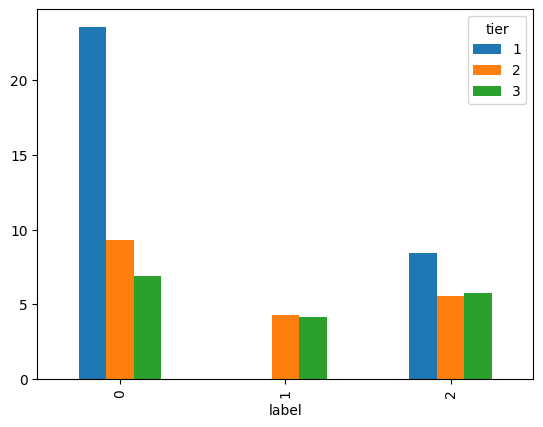

In [ ]:
pd.crosstab(index = clusters["label"],
 columns = clusters["tier"],
 values=clusters["years_of_experience_in_organization"],
 aggfunc=np.mean
 ).plot(kind = "bar")

In [ ]:
clusters.columns

Index(['company_hash', 'email_hash_x', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'years_of_experience_in_organization',
       'designation_in_organization', 'email_hash_y', 'classs', 'email_hash',
       'tier', 'label'],
      dtype='object')

In [ ]:
# Statistical Summury based on Each Cluster :
clusters.groupby("label").describe()[["ctc","classs","tier","years_of_experience_in_organization"]].T

label                                                 0             1  \
ctc                                 count  3.776231e+06  7.680305e+06   
                                    mean   4.671551e+05  3.911584e+05   
                                    std    1.546793e+05  1.074249e+05   
                                    min    3.955000e+04  4.000000e+04   
                                    25%    3.000000e+05  3.000000e+05   
                                    50%    5.000000e+05  4.000000e+05   
                                    75%    6.000000e+05  4.000000e+05   
                                    max    2.910000e+06  2.500000e+06   
classs                              count  3.776231e+06  7.680305e+06   
                                    mean   2.927344e+00  2.979102e+00   
                                    std    2.595854e-01  1.430425e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    3.000000e+00  3.000000e+00   
                                    50%    3.000000e+00  3.000000e+00   
                                    75%    3.000000e+00  3.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
tier                                count  3.776231e+06  7.680305e+06   
                                    mean   2.991457e+00  2.997873e+00   
                                    std    9.205519e-02  4.607173e-02   
                                    min    1.000000e+00  2.000000e+00   
                                    25%    3.000000e+00  3.000000e+00   
                                    50%    3.000000e+00  3.000000e+00   
                                    75%    3.000000e+00  3.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
years_of_experience_in_organization count  3.776231e+06  7.680305e+06   
                                    mean   6.915515e+00  4.116148e+00   
                                    std    1.272548e+00  6.827913e-01   
                                    min    5.000000e+00  1.000000e+00   
                                    25%    6.000000e+00  4.000000e+00   
                                    50%    7.000000e+00  4.000000e+00   
                                    75%    7.000000e+00  5.000000e+00   
                                    max    3.100000e+01  6.000000e+00   

label                                                 2  
ctc                                 count  1.879871e+06  
                                    mean   9.394622e+05  
                                    std    5.528360e+05  
                                    min    5.600000e+04  
                                    25%    7.000000e+05  
                                    50%    8.000000e+05  
                                    75%    1.000000e+06  
                                    max    1.195000e+07  
classs                              count  1.879871e+06  
                                    mean   1.898089e+00  
                                    std    3.433164e-01  
                                    min    1.000000e+00  
                                    25%    2.000000e+00  
                                    50%    2.000000e+00  
                                    75%    2.000000e+00  
                                    max    3.000000e+00  
tier                                count  1.879871e+06  
                                    mean   1.895731e+00  
                                    std    3.575251e-01  
                                    min    1.000000e+00  
                                    25%    2.000000e+00  
                                    50%    2.000000e+00  
                                    75%    2.000000e+00  
                                    max    3.000000e+00  
years_of_experience_in_organization count  1.879871e+06  
                                    mean   5.888841e+00  
                        

# **Insights & Recommendations**

1. Identify High-Performing Learners:
* Utilize manual clustering to identify top-performing learners within companies and job positions.
* Offer these high-performing learners opportunities for leadership roles, mentorship programs, or special projects to further develop their skills
and contribute to the community.
2. Optimize Compensation Strategies:
* Segment learners based on their CTC relative to their peers within the company and department.
* Adjust compensation packages for individuals who are earning significantly below or above their peers, ensuring fairness and motivation
within the organization.
3. Enhance Learning Experience:
* Leverage insights from clustering to tailor course offerings and curriculum updates to meet the specific needs and interests of different
learner segments.
* Offer specialized training programs or workshops for learners in high-demand job positions or emerging technology areas identified through
clustering.
4. Promote Career Development:
* Provide personalized career development plans for learners based on their years of experience and job positions.
* Offer resources, such as networking opportunities, skill-building workshops, and career coaching, to help learners progress in their careers
and achieve their professional goals.
5. Foster Collaboration and Networking:
* Facilitate networking events, forums, or online communities where learners can connect with peers in similar job positions or industries.
* Encourage knowledge sharing, collaboration, and peer support to foster a sense of community and facilitate continuous learning and growth.
6. Evaluate Company Partnerships:
* Analyze the clustering results at the company level to identify potential partnership opportunities with top-performing companies.
* Explore collaboration opportunities, such as corporate training programs, joint projects, or recruitment partnerships, to leverage the expertise
and resources of these companies.
7. Continuous Monitoring and Adaptation:
* Regularly monitor learner performance, engagement, and feedback to adapt strategies and initiatives accordingly.
* Stay agile and responsive to changes in the industry landscape, technological advancements, and learner preferences to maintain relevance
and effectiveness in the market.
